In [3]:
# Imports dependencies
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [5]:
# Importing the timesfm model (CPU version)
import timesfm

 See https://github.com/google-research/timesfm/blob/master/README.md for updated APIs.
Loaded PyTorch TimesFM, likely because python version is 3.11.11 (main, Mar  7 2025, 10:33:09) [Clang 16.0.0 (clang-1600.0.26.6)].


In [6]:
# Importing in the 200m parameter
tfm_one = timesfm.TimesFm(
      hparams=timesfm.TimesFmHparams(
          backend="cpu",
          per_core_batch_size=32,
          horizon_len=128,
      ),
      checkpoint=timesfm.TimesFmCheckpoint(
          huggingface_repo_id="google/timesfm-1.0-200m-pytorch"),
  )

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

In [7]:
# Importing in the 500m parameter
tfm_two = timesfm.TimesFm(
      hparams=timesfm.TimesFmHparams(
          backend="cpu",
          per_core_batch_size=32,
          horizon_len=128,
          num_layers=50,
          use_positional_embedding=False,
          context_len=2048,
      ),
      checkpoint=timesfm.TimesFmCheckpoint(
          huggingface_repo_id="google/timesfm-2.0-500m-pytorch"),
  )

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

In [8]:
# Importing in the elc dataset
elc = pd.read_csv("dataset_for_internship.csv")

In [12]:
# Visualizing the elc dataset
elc.head()
# elc.shape

,TS_ID,cal_month_date,units
0,ID_1,2022-01-01T00:00:00Z,99973
1,ID_1,2022-11-01T00:00:00Z,149595
2,ID_1,2022-05-01T00:00:00Z,110292
3,ID_1,2022-07-01T00:00:00Z,130055
4,ID_1,2022-08-01T00:00:00Z,133857


In [17]:
# Renaming columns of the elc dataset
elc_data = elc.rename(columns={'cal_month_date': 'ds', 'units': 'values', 'TS_ID': 'unique_id'})

In [18]:
elc_data.head()

,unique_id,ds,values
0,ID_1,2022-01-01T00:00:00Z,99973
1,ID_1,2022-11-01T00:00:00Z,149595
2,ID_1,2022-05-01T00:00:00Z,110292
3,ID_1,2022-07-01T00:00:00Z,130055
4,ID_1,2022-08-01T00:00:00Z,133857


In [19]:
# Reindexing of the elc dataset
order = ['ds', 'values', 'unique_id']
elc_data = elc_data.reindex(columns = order)

In [23]:
elc_data.head()
elc_data.shape

(468, 3)

In [25]:
type(elc_data['ds'][0])
print(elc_data['ds'][0])

2022-01-01T00:00:00Z


In [28]:
# Converting the string datetime representation to a datetime representation
elc_data['ds'] = pd.to_datetime(elc_data['ds'])
type(elc_data['ds'][0])
print(elc_data['ds'][0])

2022-01-01 00:00:00+00:00


In [31]:
# Sorting values because they are out of order
elc_data.sort_values('ds', inplace=True)

In [52]:
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    display(elc_data)

In [51]:
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    display(elc)

In [46]:
# Calling the forecast_on_df method for the 200m parameter mode;
forecast_horizon = 128
forecast_context_len = 468

forecast_df_200m_128_468 = tfm_one.forecast_on_df(
    inputs=elc_data,
    freq='M',
    forecast_context_len = forecast_context_len,
    value_name = 'values', 
    model_name = 'timesfm',
    normalize = True,
    verbose = True,
)

Processing dataframe with single process.
Finished preprocessing dataframe.
Finished forecasting.


/Users/anaresh/Library/Caches/pypoetry/virtualenvs/timesfm-elc-2jtdsose-py3.11/lib/python3.11/site-packages/utilsforecast/processing.py:384: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/Users/anaresh/Library/Caches/pypoetry/virtualenvs/timesfm-elc-2jtdsose-py3.11/lib/python3.11/site-packages/utilsforecast/processing.py:440: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)


In [47]:
forecast_df_200m_128_468.head()
forecast_df_200m_128_468.shape

(1536, 12)

In [41]:
# Calling the forecast_on_df method for the 500m parameter mode;
forecast_horizon = 128
forecast_context_len = 468

forecast_df_500m_128_468 = tfm_two.forecast_on_df(
    inputs=elc_data,
    freq='M',
    forecast_context_len = forecast_context_len,
    value_name = 'values', 
    model_name = 'timesfm',
    normalize = True,
    verbose = True,
)


Processing dataframe with single process.
Finished preprocessing dataframe.
Finished forecasting.


/Users/anaresh/Library/Caches/pypoetry/virtualenvs/timesfm-elc-2jtdsose-py3.11/lib/python3.11/site-packages/utilsforecast/processing.py:384: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/Users/anaresh/Library/Caches/pypoetry/virtualenvs/timesfm-elc-2jtdsose-py3.11/lib/python3.11/site-packages/utilsforecast/processing.py:440: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)


In [50]:
# Displaying the full dataset
forecast_df_500m_128_468.head()
forecast_df_500m_128_468.shape
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(forecast_df_500m_128_468)

,unique_id,ds,timesfm,timesfm-q-0.1,timesfm-q-0.2,timesfm-q-0.3,timesfm-q-0.4,timesfm-q-0.5,timesfm-q-0.6,timesfm-q-0.7,timesfm-q-0.8,timesfm-q-0.9
0,ID_1,2024-12-31 00:00:00+00:00,114151.812500,93709.328125,100931.851562,105948.562500,110155.523438,114151.812500,118184.140625,122699.609375,128190.437500,136625.375000
1,ID_1,2025-01-31 00:00:00+00:00,113717.789062,92530.000000,99983.773438,105163.992188,109469.273438,113717.789062,118046.101562,122735.859375,128639.000000,137688.500000
2,ID_1,2025-02-28 00:00:00+00:00,119352.882812,97528.093750,105204.601562,110464.695312,115012.203125,119352.882812,123824.273438,128741.335938,135082.234375,144718.281250
3,ID_1,2025-03-31 00:00:00+00:00,115621.867188,92754.890625,100786.234375,106329.210938,111133.226562,115621.867188,120387.210938,125577.257812,131938.171875,142188.703125
4,ID_1,2025-04-30 00:00:00+00:00,116205.007812,92914.117188,101074.132812,106772.640625,111602.734375,116205.007812,121072.703125,126384.531250,132956.046875,143420.656250
5,ID_1,2025-05-31 00:00:00+00:00,117355.703125,93475.281250,101924.218750,107686.125000,112635.750000,117355.703125,122224.671875,127707.023438,134424.546875,145041.328125
6,ID_1,2025-06-30 00:00:00+00:00,117743.796875,93484.523438,102088.085938,107900.484375,112947.953125,117743.796875,122677.484375,128277.070312,135240.312500,146212.968750
7,ID_1,2025-07-31 00:00:00+00:00,119595.109375,94989.546875,103565.343750,109484.226562,114571.640625,119595.109375,124654.570312,130332.554688,137466.546875,148915.468750
8,ID_1,2025-08-31 00:00:00+00:00,121407.507812,96456.382812,105142.265625,111174.335938,116369.234375,121407.507812,126597.164062,132442.734375,139811.453125,151573.750000
9,ID_1,2025-09-30 00:00:00+00:00,120833.781250,95274.898438,104189.703125,110340.539062,115686.046875,120833.781250,126178.687500,132162.812500,139588.031250,151512.015625


In [48]:
elc_forecast_200m = forecast_df_200m_128_468[['unique_id', 'ds', 'timesfm-q-0.5']]
elc_forecast_500m = forecast_df_500m_128_468[['unique_id', 'ds', 'timesfm-q-0.5']]

In [53]:
# Figuring out the number of unique_ids
unique_ids = elc_forecast_200m['unique_id'].unique()
n_ids = len(unique_ids)
print(n_ids)

12


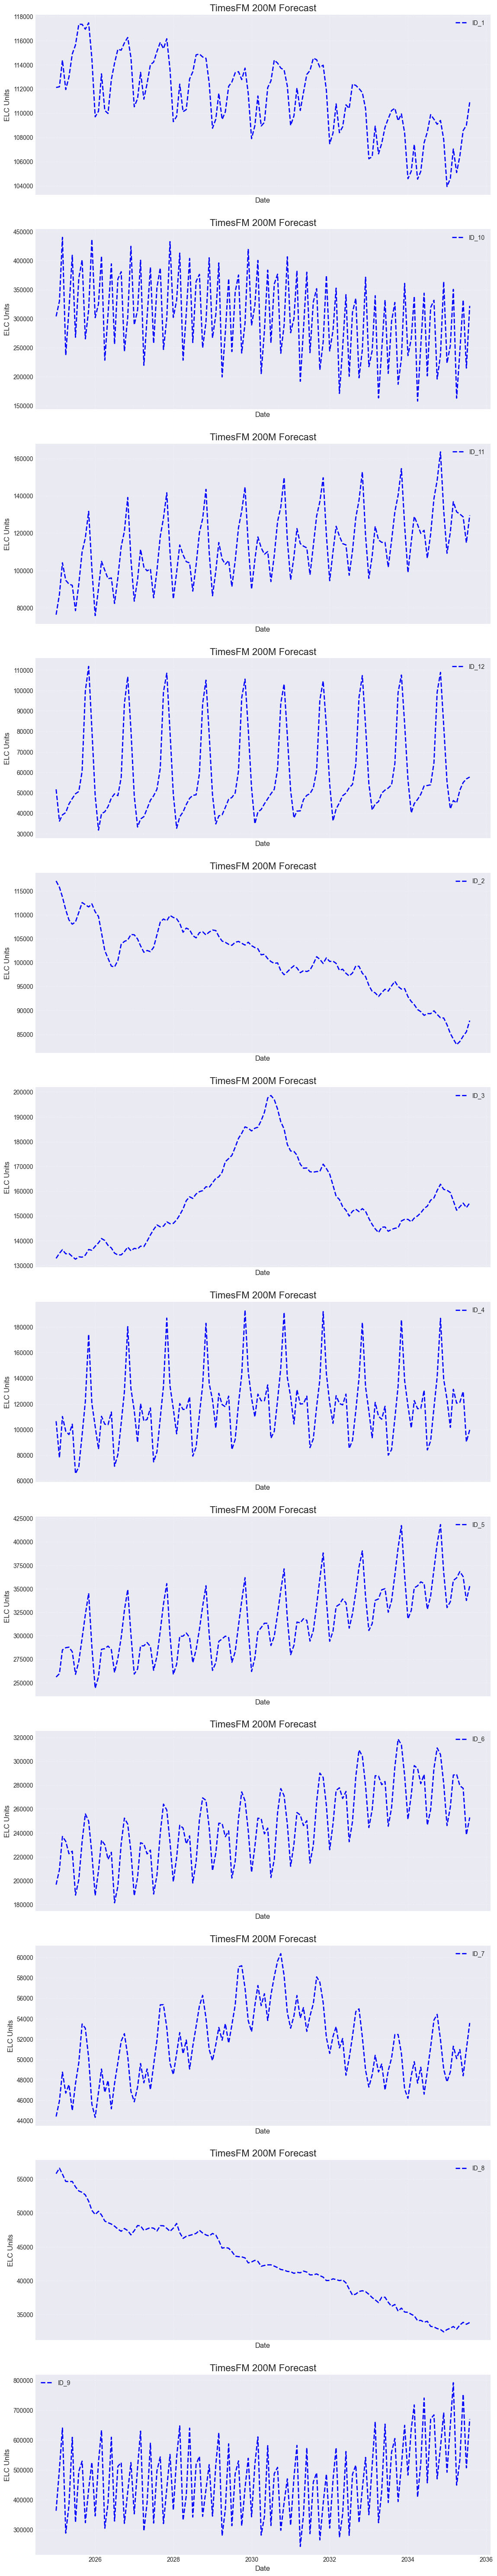

In [57]:
# Plotting the data
# Setup the plot environment
plt.style.use('seaborn-v0_8-darkgrid')
fig, axs = plt.subplots(n_ids, 1, figsize=(12, 5 * n_ids), sharex=True)

# Plot TimesFM 200M Forecast
for ax, data_id in zip(axs, unique_ids):
    elc_forecast_200m_subset = elc_forecast_200m[elc_forecast_200m['unique_id'] == data_id]
    ax.plot(elc_forecast_200m_subset['ds'], elc_forecast_200m_subset['timesfm-q-0.5'], linestyle='--', linewidth=2, color='blue', label=data_id)
    ax.set_title("TimesFM 200M Forecast", fontsize=16)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("ELC Units", fontsize=12)
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout(pad=2.5)
plt.savefig('elc_forecast_200m.png', dpi = 330)
plt.show()

In [ ]:
# Calculating unique_ids for the 500M model
unique_ids = elc_forecast_500m['unique_id'].unique()
n_ids = len(unique_ids)

# Plotting the data
# Setup the plot environment
plt.style.use('seaborn-v0_8-darkgrid')
fig, axs = plt.subplots(n_ids, 1, figsize=(12, 5 * n_ids), sharex=True)

# Plot TimesFM 500M Forecast
for ax, data_id in zip(axs, unique_ids):
    elc_forecast_500m_subset = elc_forecast_500m[elc_forecast_500m['unique_id'] == data_id]
    ax.plot(elc_forecast_500m_subset['ds'], elc_forecast_500m_subset['timesfm-q-0.5'], linestyle='--', linewidth=2, color='blue', label=data_id)
    ax.set_title("TimesFM 500M Forecast", fontsize=16)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("ELC Units", fontsize=12)
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout(pad=2.5)
plt.savefig('elc_forecast_500m.png', dpi = 330)
plt.show()